In [36]:
%matplotlib inline
%config InlineBackend.figure_formats = ['svg','png']

from src.tables_and_figures import retrive_results, final_results_df

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [37]:
def make_plot(plot_df):
    plot_df["Fairness"] = plot_df["test_fairness mean"]
    plot_df["Accuracy"] = plot_df["test_performance mean"]

    figure = plt.figure(figsize=(6, 6), dpi = 150) 
    with sns.axes_style("white"):
        sns.lineplot(
            data=plot_df,
            x="Accuracy",
            y="Fairness",
            hue="Models",
            markers=True,
            style="Models",
        )

# Moji

In [38]:
Moji_results = retrive_results("Moji")
Moji_results["FairBatch"] = Moji_results["OldFairBatch"]
Moji_results["Augmented Adv"] = Moji_results["GatedAdv"]
Moji_results["Augmented DAdv"] = Moji_results["GatedDAdv"]

In [39]:
Moji_results.keys()

dict_keys(['Adv', 'BTEO', 'BTFairBatch', 'BTGatedAdv', 'DAdv', 'FairBatch', 'FairSCL', 'GatedAdv', 'GatedBTEO', 'GatedDAdv', 'GDEO', 'GDMean', 'INLP', 'OldFairBatch', 'Vanilla', 'Augmented Adv', 'Augmented DAdv'])

In [40]:
Moji_Adv = Moji_results["Adv"].reset_index()
Moji_Adv

,adv_lambda,adv_num_subDiscriminator,adv_diverse_lambda,epoch,dev_fairness,dev_performance,dev_DTO,test_fairness,test_performance,test_DTO,opt_dir
0,0.001259,1,0.0,7,0.632872,0.724875,0.000000,0.607641,0.721180,0.003111,G:\Experimental_results\hypertune\Moji\hypertu...
1,0.001259,1,0.0,7,0.614186,0.724375,0.000000,0.595042,0.721680,0.001557,G:\Experimental_results\hypertune\Moji\hypertu...
2,0.001259,1,0.0,10,0.623298,0.724500,0.000000,0.597945,0.723056,0.000518,G:\Experimental_results\hypertune\Moji\hypertu...
3,0.001259,1,0.0,4,0.626120,0.723750,0.005846,0.603132,0.720180,0.008572,G:\Experimental_results\hypertune\Moji\hypertu...
4,0.001259,1,0.0,11,0.624915,0.724500,0.001206,0.608225,0.727557,0.000000,G:\Experimental_results\hypertune\Moji\hypertu...
...,...,...,...,...,...,...,...,...,...,...,...
300,794.328235,1,0.0,0,1.000000,0.500000,0.000000,1.000000,0.500000,0.000000,G:\Experimental_results\hypertune\Moji\hypertu...
301,794.328235,1,0.0,1,1.000000,0.500000,0.000000,1.000000,0.500000,0.000000,G:\Experimental_results\hypertune\Moji\hypertu...
302,794.328235,1,0.0,30,0.895489,0.681250,0.094672,0.870439,0.691423,0.086123,G:\Experimental_results\hypertune\Moji\hypertu...
303,794.328235,1,0.0,1,1.000000,0.500000,0.000000,1.000000,0.500000,0.000000,G:\Experimental_results\hypertune\Moji\hypertu...


In [41]:
def lambda_analysis(df):
    _df = df.copy()

    # Map lambda
    _df["log_lambda"] = [math.log10(i) for i in list(_df["adv_lambda"])]

    return pd.DataFrame(
        {
            "$log_{10}\lambda$": list(_df["log_lambda"])*2,
            "values": list(_df["test_fairness"]) + list(_df["test_performance"]),
            "metric":["fairness"]*len(_df)+["performance"]*len(_df)
        }
    )

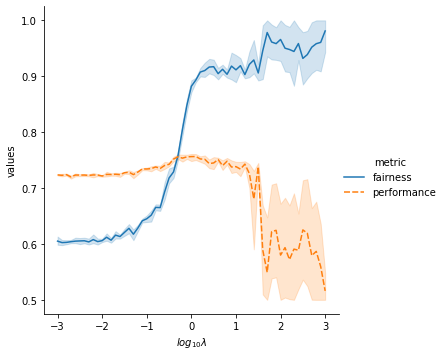

In [42]:
sns.relplot(
    data=lambda_analysis(Moji_Adv),
    x="$log_{10}\lambda$",
    y="values",
    style="metric",
    hue="metric",
    kind="line",
) 

In [70]:
old_Moji_Adv_converged = pd.read_pickle("results/old_Moji_Adv_converged.pkl")
old_Moji_Adv_converged["adv_lambda"] = old_Moji_Adv_converged["lambda"].copy()
old_Moji_Adv_converged["test_performance"] = (old_Moji_Adv_converged["Accuracy 0"]+old_Moji_Adv_converged["Accuracy 1"])/2
old_Moji_Adv_converged["TPR_GAP"] = ((old_Moji_Adv_converged["TPR 0"]-old_Moji_Adv_converged["TPR 1"])**2)**0.5
old_Moji_Adv_converged["TNR_GAP"] = ((old_Moji_Adv_converged["TNR 0"]-old_Moji_Adv_converged["TNR 1"])**2)**0.5
old_Moji_Adv_converged["test_fairness"] = 1-((old_Moji_Adv_converged["TPR_GAP"]**2+old_Moji_Adv_converged["TNR_GAP"]**2)*0.5)**0.5

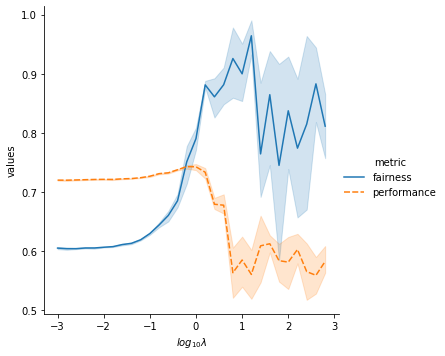

In [71]:
sns.relplot(
    data=lambda_analysis(old_Moji_Adv_converged),
    x="$log_{10}\lambda$",
    y="values",
    style="metric",
    hue="metric",
    kind="line",
) 